In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
mask_file = '/data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz'
hollywood_mashup_db = niidb.FMriActivationsDb('data/hollywood_mashup.db')

In [6]:
dtfa = DTFA.DeepTFA(hollywood_mashup_db.all(), mask=mask_file, num_factors=100, embedding_dim=2, model_time_series=True)

07/30/2019 16:36:41 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/subject-01_run-01.nii.gz with mask /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz (zscore=False, smooth=6)
07/30/2019 16:36:42 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/subject-01_run-02.nii.gz with mask /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz (zscore=False, smooth=6)
07/30/2019 16:36:42 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/subject-01_run-03.nii.gz with mask /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz (zscore=False, smooth=6)
07/30/2019 16:36:43 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/

In [7]:
dtfa.load_state('data/hollywood_mashup_k100_n1000_07232019_061942')

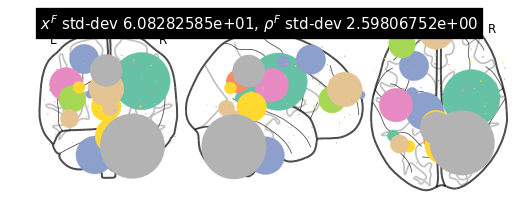

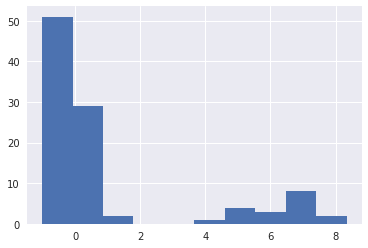

(<nilearn.plotting.displays.OrthoProjector at 0x7f02d3019a90>,
 tensor([[ 22.8318, -34.9522, -26.8498],
         [-29.3848,  44.0146,  41.9775],
         [-14.7058, -39.1994,  25.8543],
         [ 47.1352,  33.5148,  27.3875],
         [-47.1934, -49.6413,  12.9402],
         [ 44.5606, -47.0935,  22.4490],
         [ 27.2449,  -4.3106,  -4.0393],
         [ 26.1732,  90.8559,   9.4197],
         [-18.1004,   0.9513, -34.1775],
         [-25.9796,  -9.1004, -41.6786],
         [ 34.8748, -10.1425,  29.9201],
         [  4.6079,  45.8081,  27.4211],
         [ 69.8166,   9.9139,  32.9468],
         [ 35.2223,  41.3363,  47.7193],
         [ 46.2595,  62.2859,  16.3034],
         [-53.9732, -13.6794,  42.3263],
         [-53.0704,  54.0485, -13.4601],
         [ -3.5422, -53.2383,  30.1200],
         [ -1.4443, -19.7212,  52.5209],
         [ 27.3879, -36.3556,   4.4011],
         [-55.2552, -27.0592, -26.1784],
         [  2.2340,   3.2893,   3.2415],
         [ 41.7524, -33.3060,  39.2

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
def hollywood_mashup_labeler(block):
    subject = str(block.subject)
    task = block.task
    return 'Subject ' + subject + ', ' + task + ' stimulus'

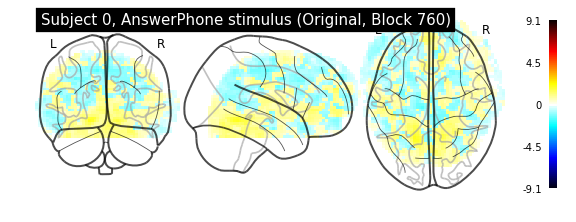

07/30/2019 16:37:50 Reconstruction Error (Frobenius Norm): 8.09347153e+01 out of 8.92251282e+01


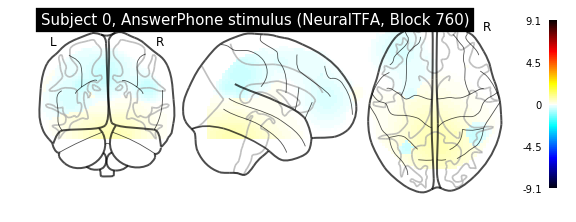

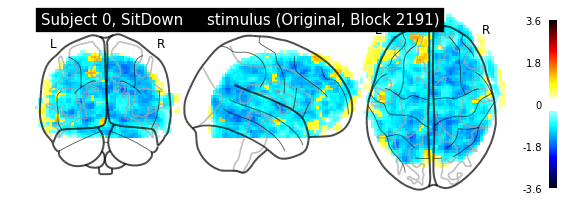

07/30/2019 16:37:53 Reconstruction Error (Frobenius Norm): 8.87109146e+01 out of 1.21868263e+02


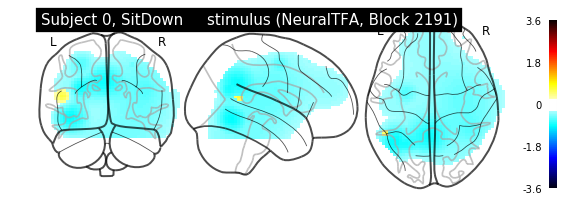

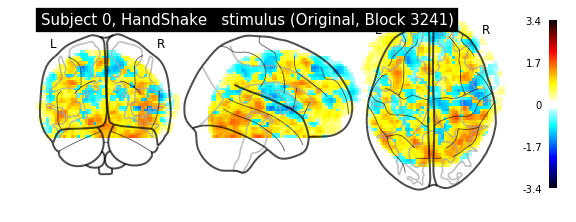

07/30/2019 16:37:55 Reconstruction Error (Frobenius Norm): 8.71585083e+01 out of 9.57031860e+01


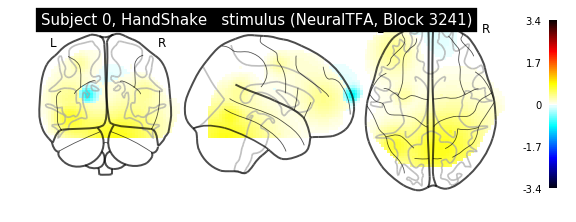

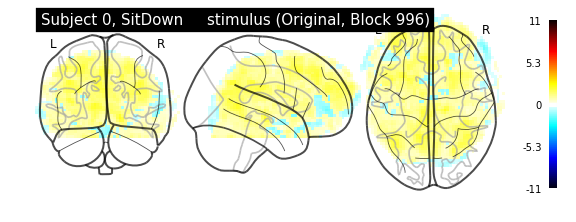

07/30/2019 16:37:57 Reconstruction Error (Frobenius Norm): 9.30685272e+01 out of 1.32035156e+02


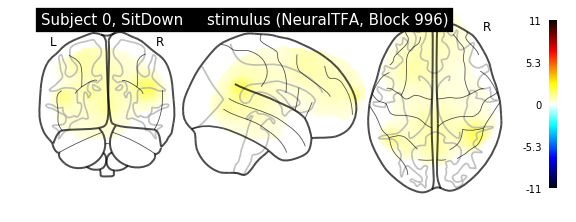

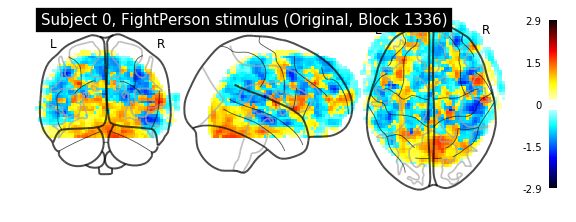

07/30/2019 16:37:59 Reconstruction Error (Frobenius Norm): 8.69954605e+01 out of 9.58722839e+01


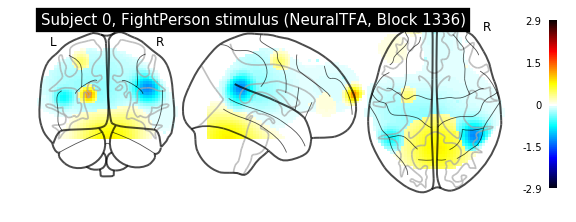

In [10]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=hollywood_mashup_labeler)
    dtfa.plot_reconstruction(b, labeler=hollywood_mashup_labeler)

In [11]:
def task_labeler(task):
    return task

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


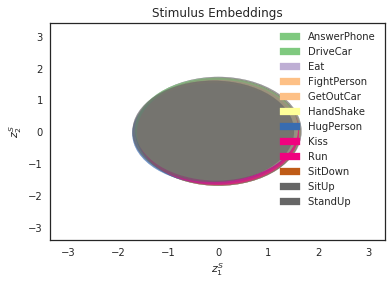

In [12]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

In [13]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


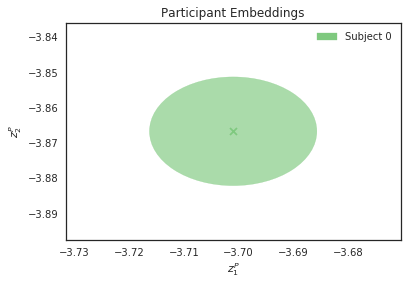

In [14]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

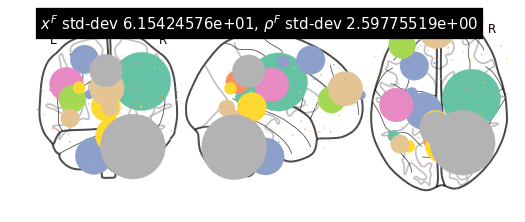

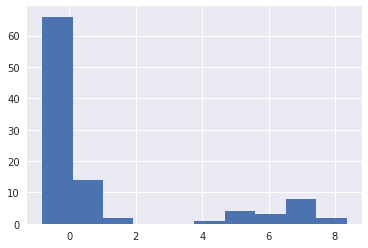

(<nilearn.plotting.displays.OrthoProjector at 0x7f02b48bc358>,
 tensor([[ 1.7692e+01, -2.4579e+01, -2.8220e+01],
         [-3.1258e+01,  3.4379e+01,  3.7227e+01],
         [-1.8986e+01, -2.7576e+01,  2.5465e+01],
         [ 4.5687e+01,  3.5799e+01,  2.7032e+01],
         [-4.6943e+01, -4.9751e+01,  1.2857e+01],
         [ 4.4594e+01, -4.7278e+01,  2.2525e+01],
         [ 3.0560e+01,  1.3749e+01, -1.1372e+01],
         [ 5.6608e+00,  7.5365e+01,  1.5974e+01],
         [-4.1908e+01,  5.0046e+00, -2.6059e+01],
         [-4.0328e+01, -9.5793e+00, -3.3673e+01],
         [ 3.5037e+01, -1.0274e+01,  2.9592e+01],
         [ 1.0426e+01,  4.2637e+01,  2.7532e+01],
         [ 7.2860e+01, -5.9917e+00,  1.8573e+01],
         [ 1.4809e+01,  3.0440e+01,  4.8031e+01],
         [ 5.4952e+01,  6.5594e+01,  1.3603e+01],
         [-4.9808e+01, -1.3502e+01,  4.0502e+01],
         [-6.7662e+01,  5.3883e+01, -5.5020e+00],
         [-3.4025e+00, -5.3115e+01,  2.9694e+01],
         [ 1.4311e+01, -9.2591e+00,  

In [15]:
dtfa.visualize_factor_embedding()

In [16]:
dtfa.average_reconstruction_error()

07/30/2019 16:40:20 Average reconstruction error (MSE): 4.15424950e-01
07/30/2019 16:40:20 Average data norm (Euclidean): 4.98781199e-01
07/30/2019 16:40:20 Percent average reconstruction error: 0.390054


(0.41542494998737406, 0.49878119884164446, 0.0039005405737354846)

In [17]:
dtfa.average_reconstruction_error(weighted=False)

07/30/2019 16:42:33 Average reconstruction error (MSE): 9.04794211e+01 +/- 1.46303881e+01
07/30/2019 16:42:33 Average data norm (Euclidean): 1.07114003e+02 +/- 2.52306394e+01
07/30/2019 16:42:33 Percent average reconstruction error: 85.688948 +/- 7.95162942e+00


(array([95.60777283, 78.02073669, 87.79747009, ..., 86.17440033,
        74.14324951, 79.70657349]),
 array([100.90693665,  82.19390106,  94.65022278, ...,  98.21504211,
         83.87232208,  93.06697845]),
 array([0.94748464, 0.94922781, 0.92759919, ..., 0.87740532, 0.88400139,
        0.85644312]))

In [18]:
dtfa = DTFA.DeepTFA(hollywood_mashup_db.all(), mask=mask_file, num_factors=100, embedding_dim=2, model_time_series=False)

07/30/2019 16:43:38 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/subject-01_run-01.nii.gz with mask /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz (zscore=False, smooth=6)
07/30/2019 16:43:39 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/subject-01_run-02.nii.gz with mask /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz (zscore=False, smooth=6)
07/30/2019 16:43:40 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/subject-01_run-03.nii.gz with mask /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz (zscore=False, smooth=6)
07/30/2019 16:43:41 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/

In [19]:
dtfa.load_state('data/hollywood_mashup_k100_n1000_07302019_090024')

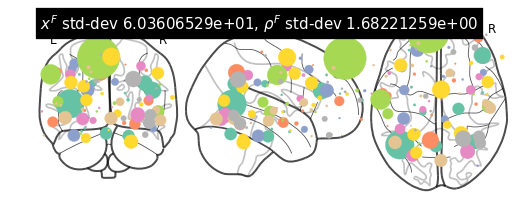

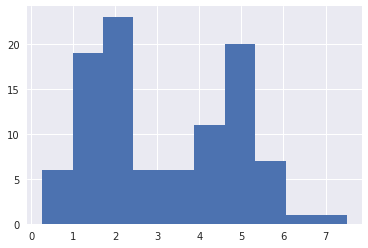

(<nilearn.plotting.displays.OrthoProjector at 0x7f02f3e437b8>,
 tensor([[ 21.3734, -21.1747, -27.6444],
         [-30.4906,  40.4877,  37.0138],
         [-16.0434, -24.5118,  27.7675],
         [ 46.7107,  34.9387,  20.2084],
         [-40.3404, -59.0753,   6.1713],
         [ 38.6388, -55.6778,  27.6855],
         [ 46.9021,  -4.2127,  -1.5361],
         [ 20.8230,  77.8963,  10.2495],
         [-28.0502,   1.5866, -22.6924],
         [-24.7782, -17.1458, -19.8873],
         [ -2.3301, -60.4322, -25.1011],
         [ 17.4681,  54.5672,  17.3043],
         [ 85.1542,  -6.8257,  16.0348],
         [ 18.0611,  26.2311,  47.3435],
         [ 42.3285,  53.8161,   9.4937],
         [-53.1816,  -7.4578,  39.9577],
         [-51.1541,  77.1130,  -9.6875],
         [ -8.1442, -54.2174,  39.5021],
         [ -6.7939, -27.7675,  61.3200],
         [ 27.9469, -50.5675, -15.0937],
         [-53.3500, -39.2167, -13.4659],
         [-24.9263,  15.2806,  -0.9063],
         [ 39.9735, -16.3016,  41.2

In [20]:
dtfa.visualize_factor_embedding()

In [21]:
def hollywood_mashup_labeler(block):
    subject = str(block.subject)
    task = block.task
    return 'Subject ' + subject + ', ' + task + ' stimulus'

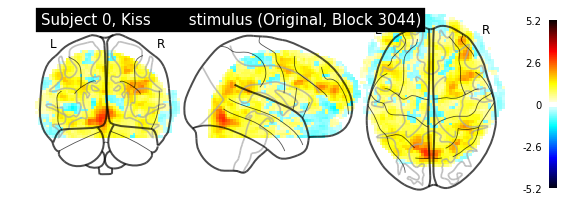

07/30/2019 16:46:15 Reconstruction Error (Frobenius Norm): 1.00621857e+02 out of 1.09241684e+02


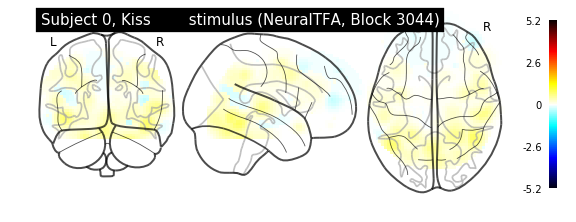

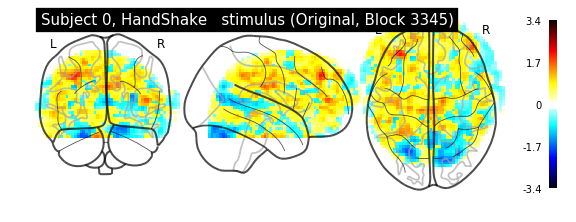

07/30/2019 16:46:18 Reconstruction Error (Frobenius Norm): 8.87937622e+01 out of 8.72116165e+01


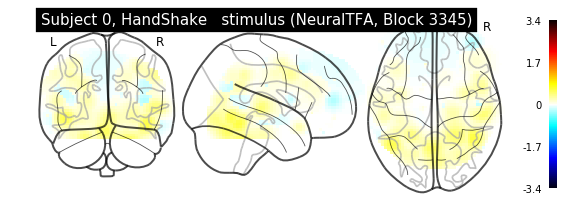

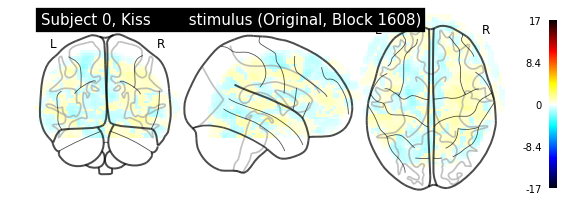

07/30/2019 16:46:20 Reconstruction Error (Frobenius Norm): 8.25279617e+01 out of 8.28499374e+01


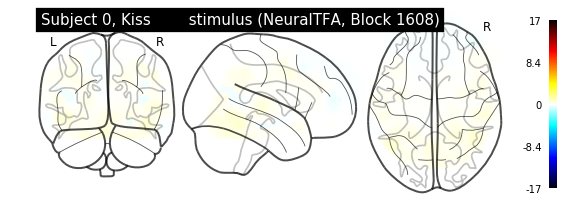

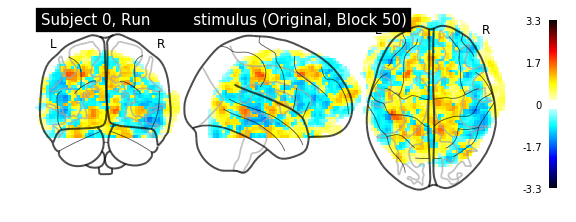

07/30/2019 16:46:22 Reconstruction Error (Frobenius Norm): 9.20835266e+01 out of 8.98548660e+01


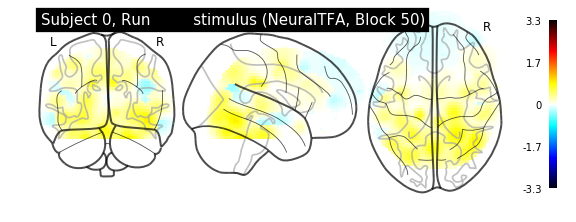

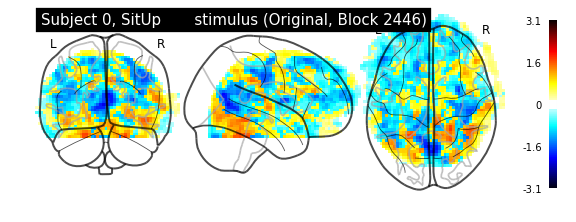

07/30/2019 16:46:25 Reconstruction Error (Frobenius Norm): 8.83720627e+01 out of 9.47329102e+01


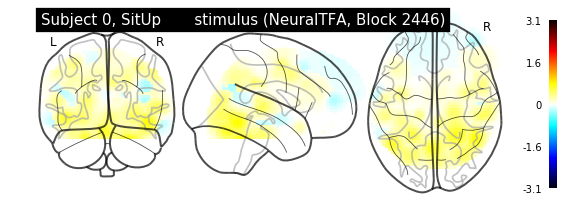

In [22]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=hollywood_mashup_labeler)
    dtfa.plot_reconstruction(b, labeler=hollywood_mashup_labeler)

In [23]:
def task_labeler(task):
    return task

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


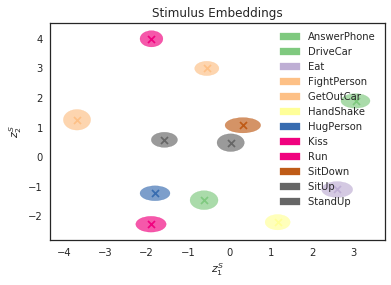

In [24]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

In [25]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


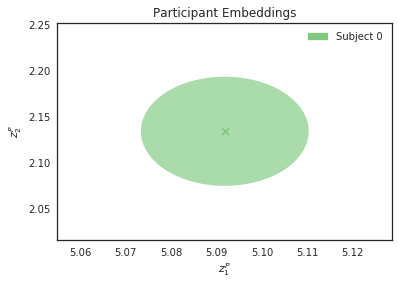

In [26]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

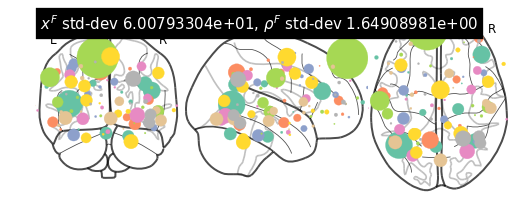

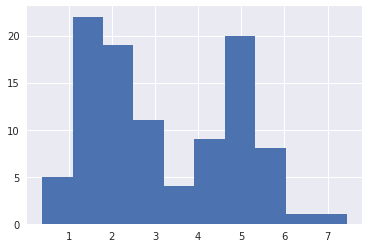

(<nilearn.plotting.displays.OrthoProjector at 0x7f02b169f278>,
 tensor([[ 21.0738, -21.4885, -27.9602],
         [-64.8808,  32.8045,  24.0632],
         [-16.1082, -25.0769,  27.7090],
         [ 45.6385,  35.8481,  19.9387],
         [-41.1326, -59.3971,   6.1157],
         [ 38.5841, -55.0507,  26.9958],
         [ 24.8962,   5.4602,  -1.8292],
         [ 23.5350,  78.5153,   8.2660],
         [-31.2581,  17.1307, -20.9790],
         [-33.0031,  -6.8045, -23.3754],
         [ -2.3831, -60.8359, -24.9178],
         [ 14.1235,  31.5316,  18.2960],
         [ 80.5983,  16.6647,  11.9829],
         [ 37.1930,  33.1054,  46.6014],
         [ 42.6978,  53.1811,  10.1308],
         [-53.8888,  -7.5614,  39.6900],
         [-46.6000,  57.2636,  -4.2941],
         [ -8.4062, -54.1247,  39.8242],
         [  0.9421, -20.8301,  52.4975],
         [ 27.9168, -51.1195, -15.1109],
         [-50.1285, -51.5579, -20.9793],
         [-23.5578,  -3.8497,   9.9669],
         [ 22.8508, -39.0591,  42.9

In [27]:
dtfa.visualize_factor_embedding()

In [28]:
dtfa.average_reconstruction_error()

07/30/2019 16:48:37 Average reconstruction error (MSE): 4.86990719e-01
07/30/2019 16:48:37 Average data norm (Euclidean): 4.98781199e-01
07/30/2019 16:48:37 Percent average reconstruction error: 0.442548


(0.48699071881377887, 0.49878119884164446, 0.004425477048104514)

In [29]:
dtfa.average_reconstruction_error(weighted=False)

07/30/2019 16:50:52 Average reconstruction error (MSE): 1.04411945e+02 +/- 2.53500689e+01
07/30/2019 16:50:52 Average data norm (Euclidean): 1.07114003e+02 +/- 2.52306394e+01
07/30/2019 16:50:52 Percent average reconstruction error: 97.527889 +/- 4.66309829e+00


(array([96.46630096, 80.34082031, 91.7392807 , ..., 90.61669159,
        78.14877319, 85.11209869]),
 array([100.90693665,  82.19390106,  94.65022278, ...,  98.21504211,
         83.87232208,  93.06697845]),
 array([0.95599276, 0.97745477, 0.96924527, ..., 0.92263557, 0.93175879,
        0.91452522]))